In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math


UsageError: Line magic function `%` not found.


In [58]:
df=pd.read_csv("Titanic.csv")
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [59]:
df.shape

(891, 10)

In [60]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


Analyzing Data

<Axes: xlabel='survived', ylabel='count'>

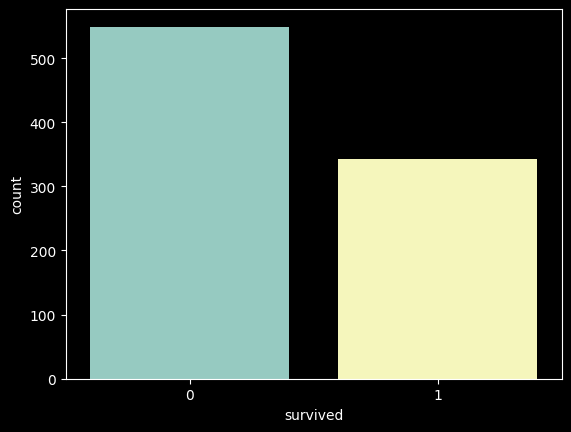

In [61]:
sns.countplot(x="survived", data=df)

<Axes: xlabel='survived', ylabel='count'>

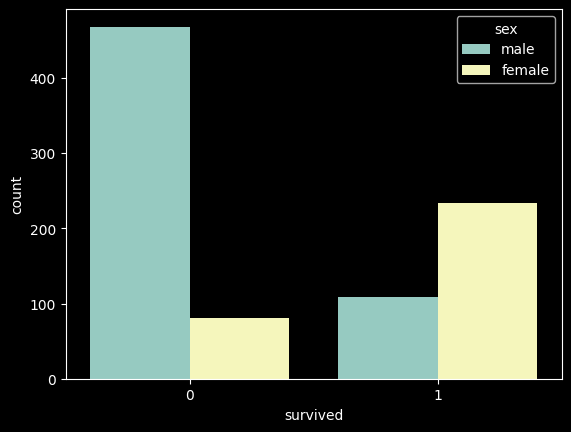

In [62]:
sns.countplot(x='survived',hue='sex', data=df)

<Axes: xlabel='survived', ylabel='count'>

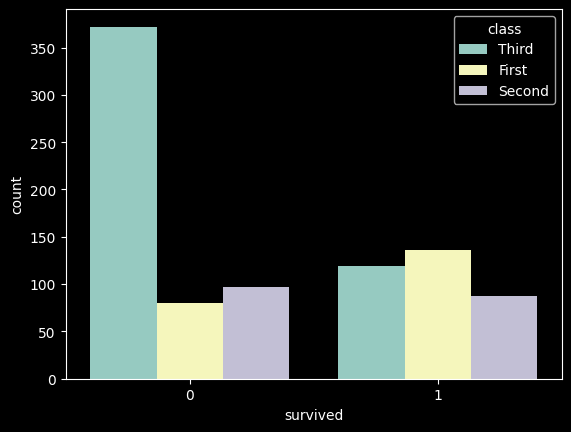

In [64]:
sns.countplot(x='survived',hue='class', data=df)

<Axes: ylabel='Frequency'>

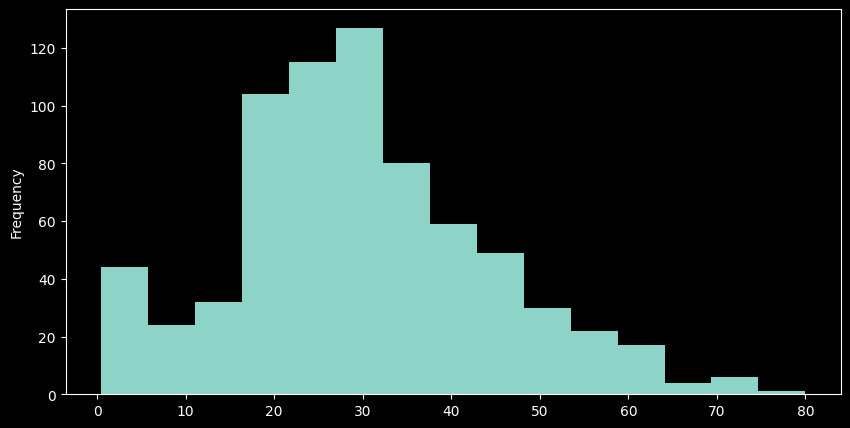

In [65]:
df['age'].plot.hist(bins=15, figsize=(10,5))

<Axes: ylabel='Frequency'>

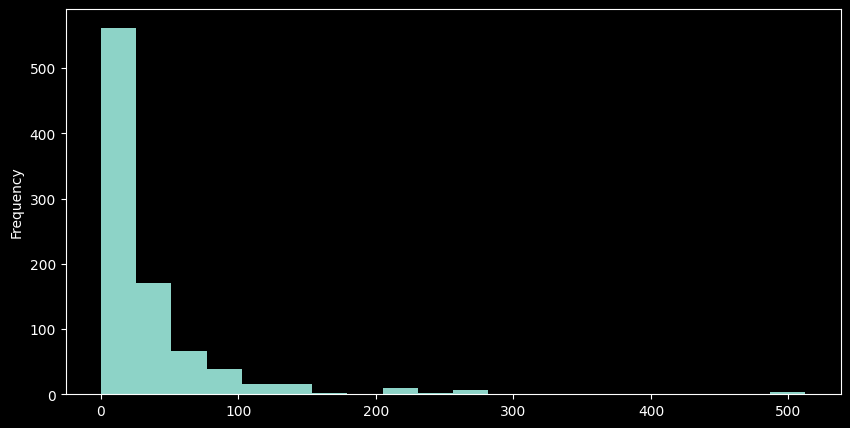

In [66]:
df['fare'].plot.hist(bins=20, figsize=(10,5))

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


<Axes: xlabel='sibsp', ylabel='count'>

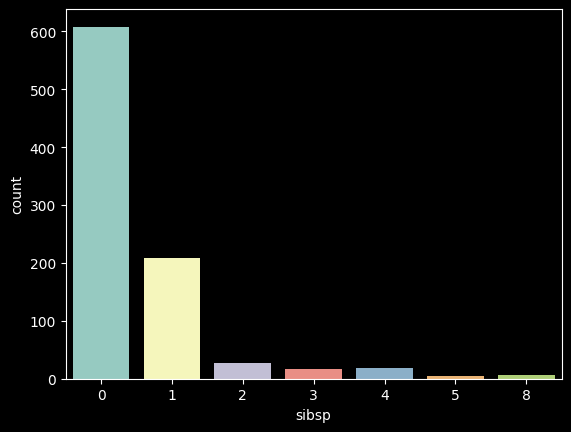

In [68]:
sns.countplot(x='sibsp',data=df)

Data Wrangling

In [69]:
df.isnull().sum()


sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

<Axes: >

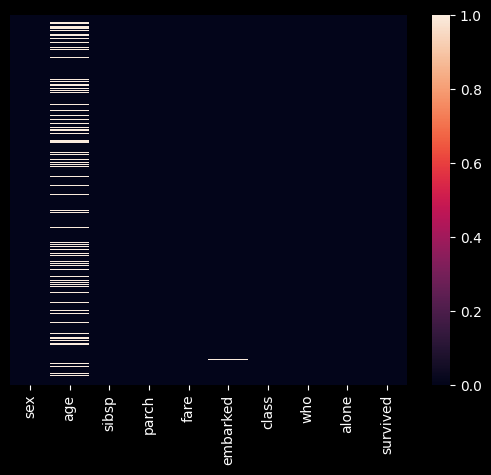

In [70]:
sns.heatmap(df.isnull(),yticklabels=False)

<Axes: xlabel='class', ylabel='age'>

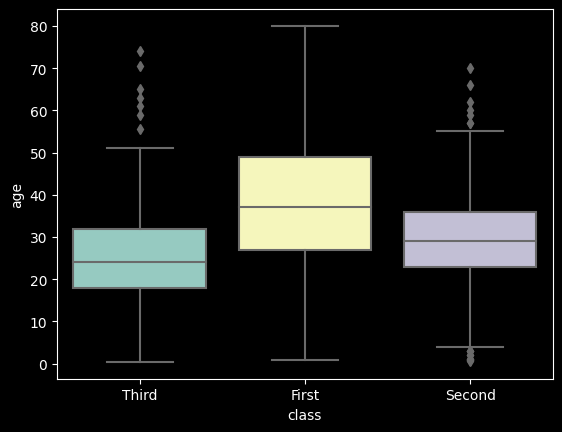

In [19]:
sns.boxplot(x='class', y='age',data=df)

In [71]:
df=pd.read_csv('Titanic.csv')
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [72]:
df.dropna(inplace=True)

<Axes: >

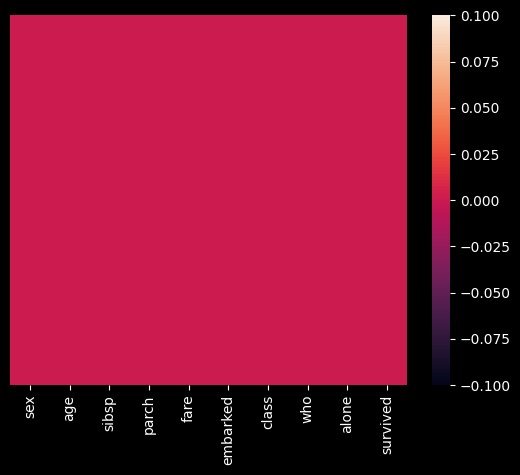

In [10]:
sns.heatmap(df.isnull(),yticklabels=False, )

In [73]:
sex=pd.get_dummies(df['sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [74]:
embarked=pd.get_dummies(df['embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [75]:
pclass=pd.get_dummies(df['class'],drop_first=True)
pclass.head()

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [108]:
df1=pd.concat([df,sex,embarked,pclass],axis=1)
df1.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,male,Q,S,Second,Third
0,male,22.0,1,0,7.2500,S,Third,man,False,0,1,0,1,0,1
1,female,38.0,1,0,71.2833,C,First,woman,False,1,0,0,0,0,0
2,female,26.0,0,0,7.9250,S,Third,woman,True,1,0,0,1,0,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1,0,0,1,0,0
4,male,35.0,0,0,8.0500,S,Third,man,True,0,1,0,1,0,1


In [109]:
df1.drop(['embarked','class','who','sex','alone'],axis=1,inplace=True)


In [110]:
df1.head()

,age,sibsp,parch,fare,survived,male,Q,S,Second,Third
0,22.0,1,0,7.2500,0,1,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,0,0,0
2,26.0,0,0,7.9250,1,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,1,0,1


Training Data

In [112]:
X=df1.drop('survived', axis=1)
y=df1['survived']

In [113]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3 , random_state=1)

In [114]:
from sklearn.linear_model import LogisticRegression


In [115]:
logmodel=LogisticRegression()



In [116]:

logmodel.fit(X_train, y_train)


c:\Users\Muhammad Ammar Dogar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
prediction=logmodel.predict(X_test)

In [124]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction)


'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[102,  24],
       [ 25,  63]], dtype=int64)